# Surface visualization

## Set the enviroment

In [195]:
# python notebook
#
# Tutorial 2 - Surface visualization 
# micapipe v0.1.1
#
# Created by RRC on September 2021 (the second year of the pademic)

# Set the environment
import os
import numpy as np
import matplotlib as plt
import nibabel as nb
from nibabel.freesurfer.mghformat import load
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.datasets import load_conte69

# Set the working directory to the 'out' directory
os.chdir("~/out") # <<<<<<<<<<<< CHANGE THIS PATH

# This variable will be different for each subject
subjectID='sub-HC001_ses-01'           # <<<<<<<<<<<< CHANGE THIS SUBJECT's ID
subjectDir='micapipe/sub-HC001/ses-01' # <<<<<<<<<<<< CHANGE THIS SUBJECT's DIRECTORY

# Here we define the atlas 
atlas='schaefer-400' # <<<<<<<<<<<< CHANGE THIS ATLAS

# Set paths and variables
dir_FS = 'freesurfer/' + subjectID
dir_conte = subjectDir + '/anat/surfaces/conte69/'
dir_morph = subjectDir + '/anat/surfaces/morphology/'
dir_mpc = subjectDir + '/anat/surfaces/micro_profiles/'
dir_func = subjectDir + '/func/surfaces/'

## Load all the surfaces

In [231]:
# Load native pial surface
pial_lh = read_surface(dir_FS+'/surf/lh.pial', itype='fs')
pial_rh = read_surface(dir_FS+'/surf/rh.pial', itype='fs')

# Load native mid surface
mid_lh = read_surface(dir_FS+'/surf/lh.midthickness.surf.gii', itype='gii') 
mid_rh = read_surface(dir_FS+'/surf/rh.midthickness.surf.gii', itype='gii')

# Load native white matter surface
wm_lh = read_surface(dir_FS+'/surf/lh.white', itype='fs')
wm_rh = read_surface(dir_FS+'/surf/rh.white', itype='fs')

# Load native inflated surface
inf_lh = read_surface(dir_FS+'/surf/lh.inflated', itype='fs')
inf_rh = read_surface(dir_FS+'/surf/rh.inflated', itype='fs')

# Native sphere
sph_lh = read_surface(dir_conte+subjectID+'_lh_sphereReg.surf.gii', itype='gii') 
sph_rh = read_surface(dir_conte+subjectID+'_rh_sphereReg.surf.gii', itype='gii') 

# Load fsaverage5 
fs5_lh = read_surface('freesurfer/fsaverage5/surf/lh.pial', itype='fs')
fs5_rh = read_surface('freesurfer//fsaverage5/surf/rh.pial', itype='fs')

# Load fsaverage5 inflated
fs5_inf_lh = read_surface('freesurfer/fsaverage5/surf/lh.inflated', itype='fs')
fs5_inf_rh = read_surface('freesurfer//fsaverage5/surf/rh.inflated', itype='fs')

# Load conte69
c69_lh, c69_rh = load_conte69()

# Native conte69 pial surface
c69_pial_lh_c69 = read_surface(dir_conte+subjectID+'_space-conte69-32k_desc-lh_pial.surf.gii', itype='gii') 
c69_pial_rh_c69 = read_surface(dir_conte+subjectID+'_space-conte69-32k_desc-rh_pial.surf.gii', itype='gii') 

# Native conte69 midsurface
c69_mid_lh = read_surface(dir_conte+subjectID+'_space-conte69-32k_desc-lh_midthickness.surf.gii', itype='gii') 
c69_mid_rh = read_surface(dir_conte+subjectID+'_space-conte69-32k_desc-rh_midthickness.surf.gii', itype='gii') 

# Native conte69 white matter
c69_wm_lh = read_surface(dir_conte+subjectID+'_space-conte69-32k_desc-lh_white.surf.gii', itype='gii') 
c69_wm_rh = read_surface(dir_conte+subjectID+'_space-conte69-32k_desc-rh_white.surf.gii', itype='gii')

# Morphology
## Thickness
### Thickness: Inflated native surface

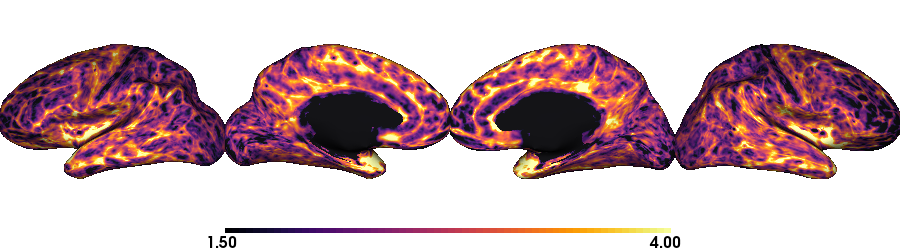

In [233]:
# Load the data
th_lh = dir_morph + subjectID + '_space-fsnative_desc-lh_thickness.mgh'
th_rh = dir_morph + subjectID + '_space-fsnative_desc-rh_thickness.mgh'
th_nat = np.hstack(np.concatenate((np.array(load(th_lh).get_fdata()), 
                                   np.array(load(th_rh).get_fdata())), axis=0))

# Plot on surface
plot_hemispheres(inf_lh, inf_rh, array_name=th_nat, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both', 
                 nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="inferno", transparent_bg=False)

### Thickness: Inflated fsaverage5

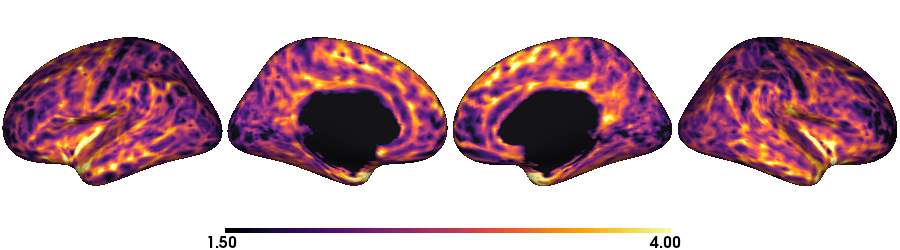

In [234]:
# Load the data
th_lh_fs5 = dir_morph + subjectID + '_space-fsaverage5_desc-lh_thickness.mgh'
th_rh_fs5 = dir_morph + subjectID + '_space-fsaverage5_desc-rh_thickness.mgh'
th_fs5 = np.hstack(np.concatenate((np.array(load(th_lh_fs5).get_fdata()), 
                                   np.array(load(th_rh_fs5).get_fdata())), axis=0))

# Plot on surface
plot_hemispheres(fs5_inf_lh, fs5_inf_rh, array_name=th_fs5, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="inferno", transparent_bg=False)

### Thickness: conte 69

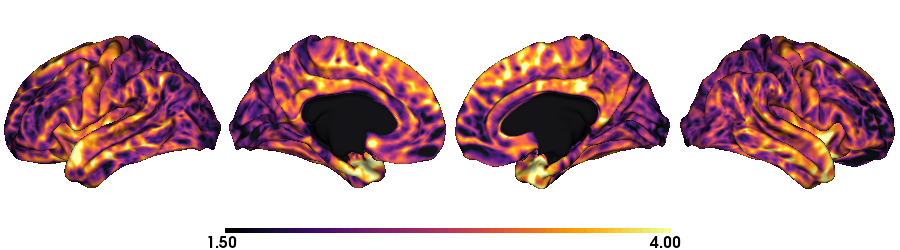

In [235]:
# Load the data
th_lh_c69 = dir_morph + subjectID + '_space-conte69-32k_desc-lh_thickness.mgh'
th_rh_c69 = dir_morph + subjectID + '_space-conte69-32k_desc-rh_thickness.mgh'
th_c69 = np.hstack(np.concatenate((np.array(load(th_lh_c69).get_fdata()), 
                                   np.array(load(th_rh_c69).get_fdata())), axis=0))

# Plot on surface
plot_hemispheres(c69_lh, c69_rh, array_name=th_c69, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="inferno", transparent_bg=False)

## Curvature
### Curvature: Inflated native surface

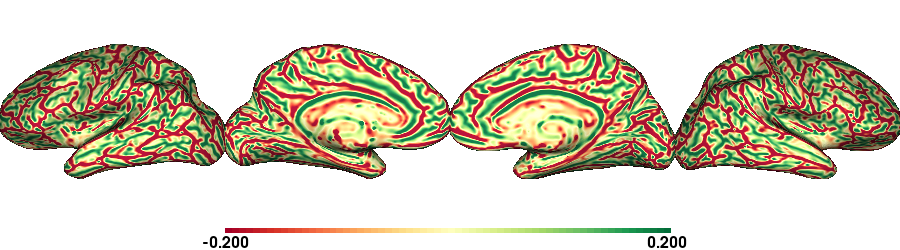

In [236]:
# Load the data
cv_lh = dir_morph + subjectID + '_space-fsnative_desc-lh_curvature.mgh'
cv_rh = dir_morph + subjectID + '_space-fsnative_desc-rh_curvature.mgh'
cv = np.hstack(np.concatenate((np.array(load(cv_lh).get_fdata()), 
                               np.array(load(cv_rh).get_fdata())), axis=0))

# Plot on surface
plot_hemispheres(inf_lh, inf_rh, array_name=cv, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap='RdYlGn', transparent_bg=False)

### Curvature: Inflated fsaverage5

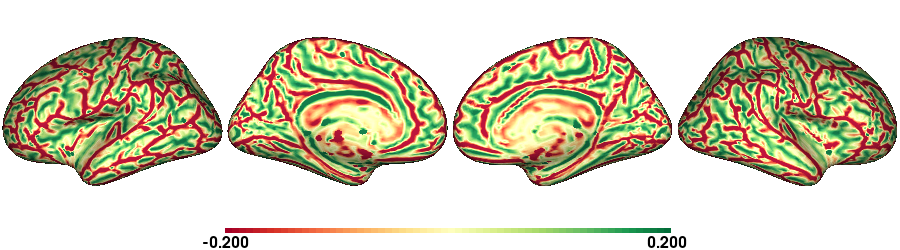

In [237]:
# Load the data
cv_lh_fs5 = dir_morph + subjectID + '_space-fsaverage5_desc-lh_curvature.mgh'
cv_rh_fs5 = dir_morph + subjectID + '_space-fsaverage5_desc-rh_curvature.mgh'
cv_fs5 = np.hstack(np.concatenate((np.array(load(cv_lh_fs5).get_fdata()), 
                                   np.array(load(cv_rh_fs5).get_fdata())), axis=0))

# Plot on surface
plot_hemispheres(fs5_inf_lh, fs5_inf_rh, array_name=cv_fs5, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap='RdYlGn', transparent_bg=False)

### Curvature: conte 69

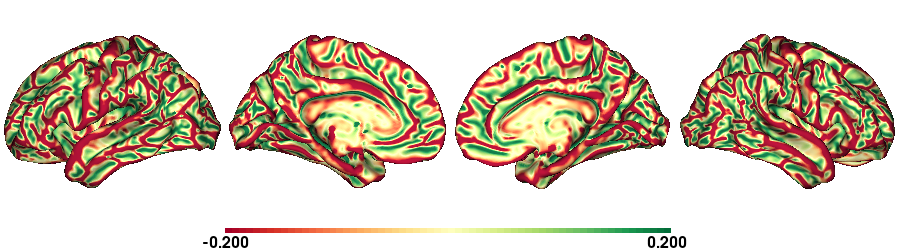

In [238]:
# Load the data
cv_lh_c69 = dir_morph + subjectID + '_space-conte69-32k_desc-lh_curvature.mgh'
cv_rh_c69 = dir_morph + subjectID + '_space-conte69-32k_desc-rh_curvature.mgh'
cv_c69 = np.hstack(np.concatenate((np.array(load(cv_lh_c69).get_fdata()), 
                                   np.array(load(cv_rh_c69).get_fdata())), axis=0))

# Plot on surface
plot_hemispheres(c69_lh, c69_rh, array_name=cv_c69, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap='RdYlGn', transparent_bg=False)

## Morphology Smoothed
### Thickness fsaverage5 fwhm=10mm

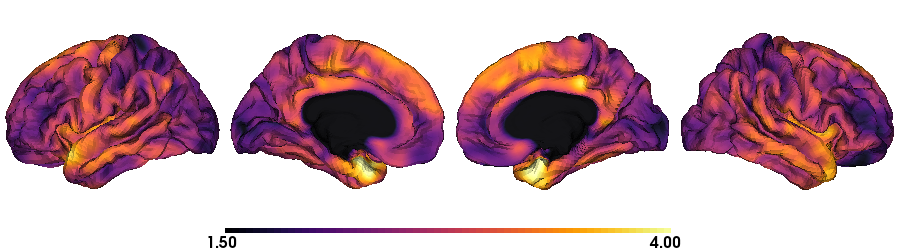

In [239]:
# Load the data
th_lh_fs10 = dir_morph + subjectID + '_space-fsaverage5_desc-lh_thickness_10mm.mgh'
th_rh_fs10 = dir_morph + subjectID + '_space-fsaverage5_desc-rh_thickness_10mm.mgh'
th_fs10 = np.hstack(np.concatenate((np.array(load(th_lh_fs10).get_fdata()), 
                                    np.array(load(th_rh_fs10).get_fdata())), axis=0))

# Plot on surface
plot_hemispheres(fs5_lh, fs5_rh, array_name=th_fs10, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="inferno", transparent_bg=False)

### Thickness conte69 fwhm=10mm

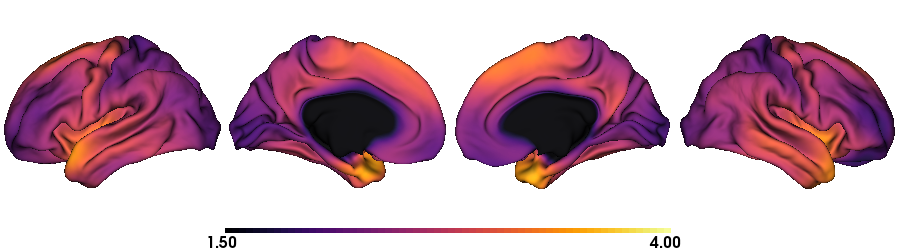

In [240]:
# Load the data
th_lh_c69S = dir_morph + subjectID + '_space-conte69-32k_desc-lh_thickness_10mm.mgh'
th_rh_c69S = dir_morph + subjectID + '_space-conte69-32k_desc-rh_thickness_10mm.mgh'
th_c69S = np.hstack(np.concatenate((np.array(load(th_lh_c69S).get_fdata()), 
                                    np.array(load(th_rh_c69S).get_fdata())), axis=0))

# Plot on surface
plot_hemispheres(c69_lh, c69_rh, array_name=th_c69S, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="inferno", transparent_bg=False)

### Curvature fsaverage5 fwhm=10mm

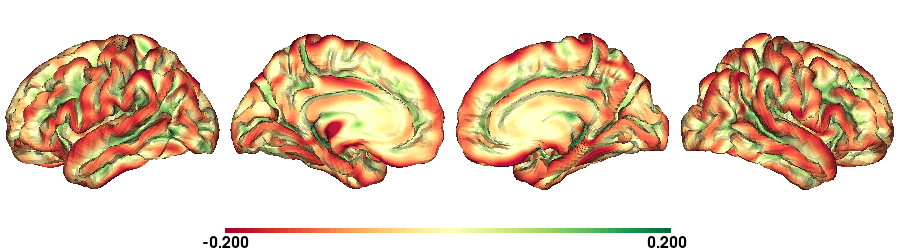

In [241]:
# Load the data
cv_lh_fs5 = dir_morph + subjectID + '_space-fsaverage5_desc-lh_curvature_10mm.mgh'
cv_rh_fs5 = dir_morph + subjectID + '_space-fsaverage5_desc-rh_curvature_10mm.mgh'
cv_fs5 = np.hstack(np.concatenate((np.array(load(cv_lh_fs5).get_fdata()), 
                                   np.array(load(cv_rh_fs5).get_fdata())), axis=0))

# Plot on surface
plot_hemispheres(fs5_lh, fs5_rh, array_name=cv_fs5, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap='RdYlGn', transparent_bg=False)

### Curvature conte69 fwhm=10mm

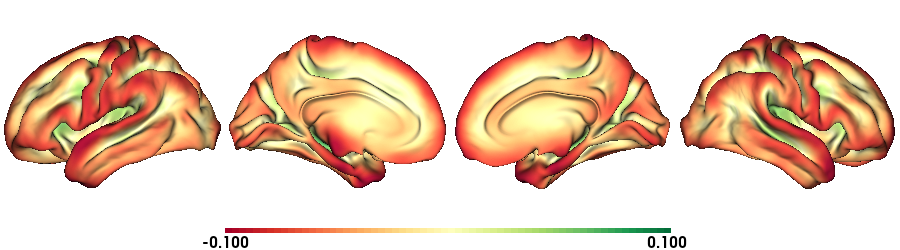

In [258]:
# Load the data
cv_lh_c69S = dir_morph + subjectID + '_space-conte69-32k_desc-lh_curvature_10mm.mgh'
cv_rh_c69S = dir_morph + subjectID + '_space-conte69-32k_desc-rh_curvature_10mm.mgh'
cv_c69S = np.hstack(np.concatenate((np.array(load(cv_lh_c69S).get_fdata()), 
                                    np.array(load(cv_rh_c69S).get_fdata())), axis=0))

# Plot on surface
plot_hemispheres(c69_lh, c69_rh, array_name=cv_c69S, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(-0.1, 0.1), cmap='RdYlGn', transparent_bg=False)

## Conte69
### Conte 69: Native pial surface

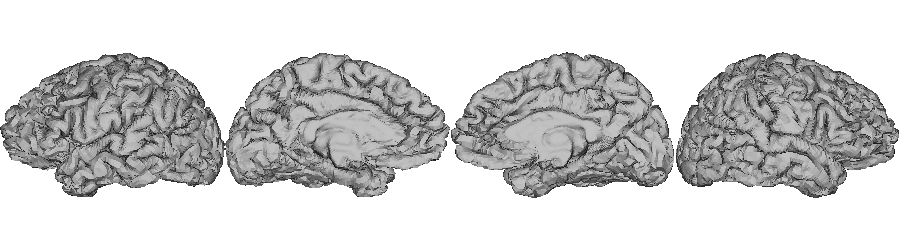

In [247]:
# Create a vector of zeros
Val = np.repeat(0, c69_pial_lh_c69.n_points + c69_pial_rh_c69.n_points, axis=0)
# Surface color
grey = plt.colors.ListedColormap(np.full((256, 4), [0.65, 0.65, 0.65, 1]))

# Plot the surface
plot_hemispheres(c69_pial_lh_c69, c69_pial_rh_c69, array_name=Val, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap=grey, transparent_bg=False)

### Conte 69: Native middle surface

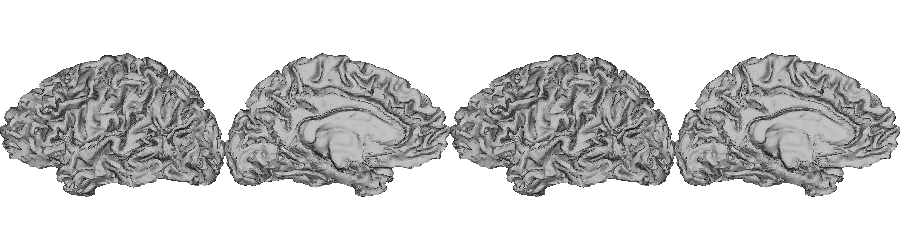

In [248]:
# Plot the surface
plot_hemispheres(c69_mid_lh, c69_mid_lh, array_name=Val, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(-1,1), cmap=grey, transparent_bg=False)

### Conte 69: White surface

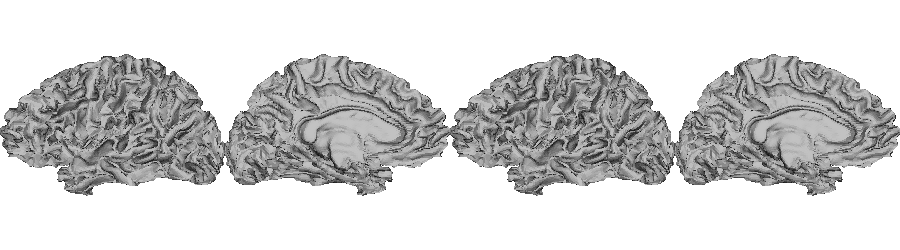

In [249]:
# Plot the surface
plot_hemispheres(c69_wm_lh, c69_wm_lh, array_name=Val, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap=grey, transparent_bg=False)

# Native sphere

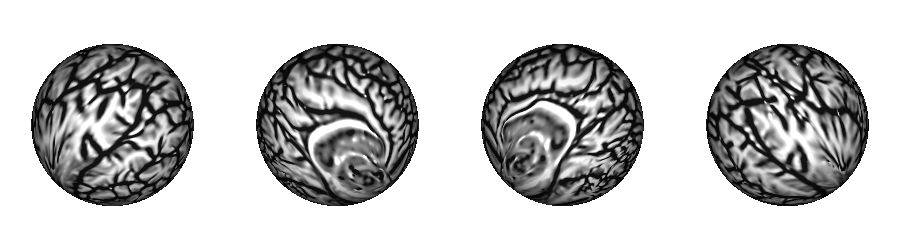

In [250]:
# Plot the surface
plot_hemispheres(sph_lh, sph_rh, array_name=CV, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap="gray", transparent_bg=False)

# Microstructural profiles
## MPC native surface (10) 

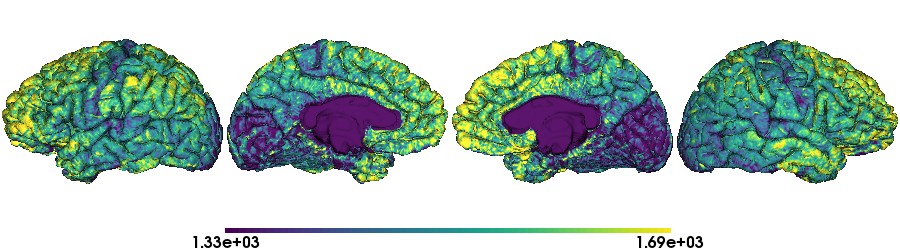

In [251]:
# Create a mask
mask = np.hstack( np.where(th_nat < 0.5, 0, 1) )

# Load the MPC
mpc_lh = dir_mpc + subjectID + '_space-fsnative_desc-lh_MPC-10.mgh'
mpc_rh = dir_mpc + subjectID + '_space-fsnative_desc-rh_MPC-10.mgh'
mpc = np.hstack(np.concatenate((np.array(load(mpc_lh).get_fdata()), 
                                np.array(load(mpc_rh).get_fdata())), axis=0))*mask

# Set color range based on MPC distribution
Qt = (round(np.quantile(mpc[np.nonzero(mpc)],0.05),0), round(np.quantile(mpc[np.nonzero(mpc)],0.95),0))

# Plot MPC on surface
plot_hemispheres(pial_lh, pial_rh, array_name=mpc, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
            nan_color=(0, 0, 0, 1), color_range=Qt, cmap="viridis",transparent_bg=False)

## MPC fsaverage5 surface (10) 

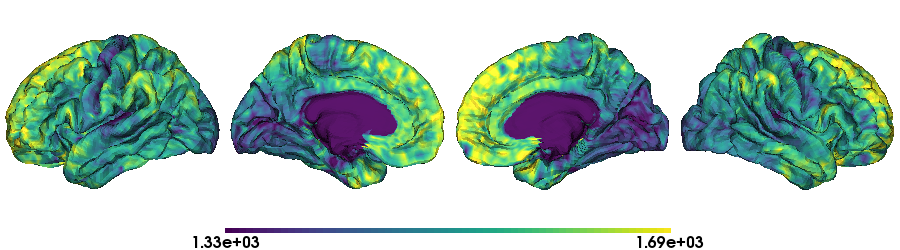

In [252]:
# Create a mask
mask_fs5 = np.hstack( np.where(th_fs5 < 0.5, 0, 1) )

# Load the MPC
mpc_lh_fs5 = dir_mpc + subjectID + '_space-fsaverage5_desc-lh_MPC-10.mgh'
mpc_rh_fs5 = dir_mpc + subjectID + '_space-fsaverage5_desc-rh_MPC-10.mgh'
mpc_fs5 = np.hstack(np.concatenate((np.array(load(mpc_lh_fs5).get_fdata()), 
                                    np.array(load(mpc_rh_fs5).get_fdata())), axis=0))*mask_fs5

# Plot MPC on surface
plot_hemispheres(fs5_lh, fs5_rh, array_name=mpc_fs5, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
            nan_color=(0, 0, 0, 1), color_range=Qt, cmap="viridis",transparent_bg=False)

## MPC conte69 surface (10)

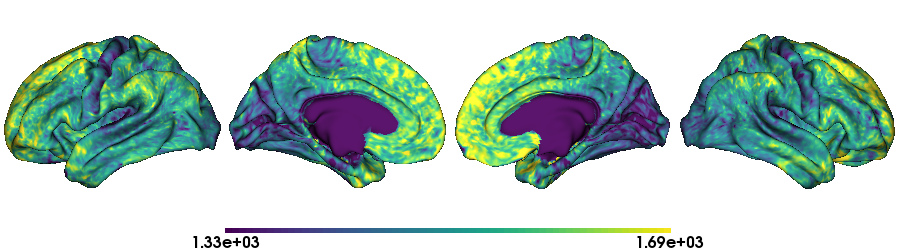

In [253]:
# Create a mask
mask_c69 = np.hstack( np.where(th_c69 < 0.5, 0, 1) )

# Load the MPC
mpc_lh_c69 = dir_mpc + subjectID + '_space-conte69-32k_desc-lh_MPC-10.mgh'
mpc_rh_c69 = dir_mpc + subjectID + '_space-conte69-32k_desc-rh_MPC-10.mgh'
mpc_c69 = np.hstack(np.concatenate((np.array(load(mpc_lh_c69).get_fdata()), np.array(load(mpc_rh_c69).get_fdata())), axis=0))*mask_c69

# Plot MPC on the surface
plot_hemispheres(c69_lh, c69_rh, array_name=mpc_c69, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
            nan_color=(0, 0, 0, 1), color_range=Qt, cmap="viridis",transparent_bg=False)

# Parcellations
## Schaefer-400 labels

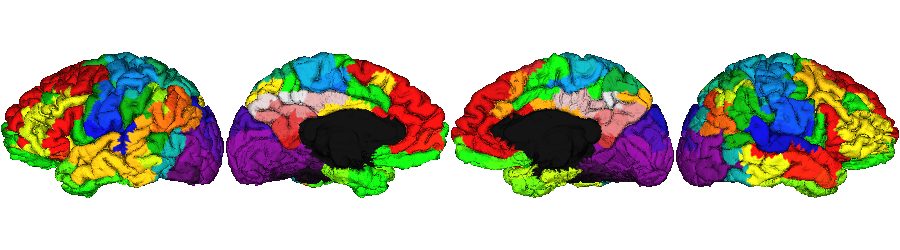

In [254]:
# Load annotation file
annot = 'schaefer-400'
annot_lh= dir_FS + '/label/lh.' + annot + '_mics.annot'
annot_rh= dir_FS + '/label/rh.' + annot + '_mics.annot'
label = np.concatenate((nb.freesurfer.read_annot(annot_lh)[0], nb.freesurfer.read_annot(annot_rh)[0]), axis=0)

# plot labels on surface
plot_hemispheres(pial_lh, pial_rh, array_name=label*mask, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), cmap='nipy_spectral', transparent_bg=False)

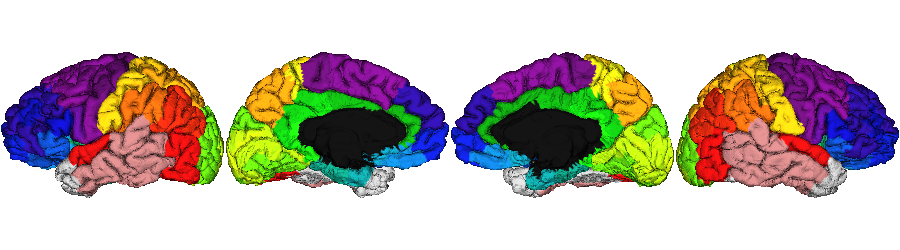

In [255]:
# Load annotation file
annot = 'economo'
annot_lh= dir_FS + '/label/lh.' + annot + '_mics.annot'
annot_rh= dir_FS + '/label/rh.' + annot + '_mics.annot'
label = np.concatenate((nb.freesurfer.read_annot(annot_lh)[0], nb.freesurfer.read_annot(annot_rh)[0]), axis=0)

# plot labels on surface
plot_hemispheres(pial_lh, pial_rh, array_name=label*mask, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), cmap='nipy_spectral', transparent_bg=False)